# Time Series - Stock Price Prediction
## Part 1 - Data Explanatory Analysis
This notebook focuses on examining the raw dataset containing daily historical prices of Google stocks. The goal is to identify a specific timeframe suitable for further analysis and prediction using LSTM.

> **INPUT**: The raw data file of all available stock prices of Google (Alphabet Inc.), as downloaded from its original source. <br/>
> **OUTPUT**: The extracted historical data of the targeted period for analysis, stored in an intermediary location for next steps.

### 1. INITIALIZATION

In [27]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt



Matplotlib is building the font cache; this may take a moment.


### 2. LOAD DATASET FILE

The dataset we are going to initially load and explore is the historical records of daily price details of Google (Alphabet Inc.) sourced from [Yahoo Finance](https://finance.yahoo.com/quote/GOOG).

At first, we load the complete dataset available spanning a period from 2004-08-19 up until the time of creating this script.

The main objective of loading the entire dataset is to choose a particular time frame for analysis.

In [4]:
# Download 6 years of daily data for GOOG
ticker = "GOOG"
df = yf.download(ticker, period="6y", interval="1d")



C:\Users\DeLL\AppData\Local\Temp\ipykernel_8596\2713003567.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="6y", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [18]:
# Reset index so Date is a column
df = df.reset_index()
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)
df.head()

Price,index,Date,Close,High,Low,Open,Volume
0,0,2019-10-02,58.431637,59.442219,58.166449,59.442219,32302000
1,1,2019-10-03,58.987831,59.048914,57.726462,58.598993,32424000
2,2,2019-10-04,60.039139,60.160307,59.054377,59.189454,23248000
3,3,2019-10-07,59.973583,60.496206,59.778420,59.810700,16858000
4,4,2019-10-08,59.052391,59.894131,59.046431,59.472516,20786000


In [19]:
# Make sure folder exists
os.makedirs("../data/raw", exist_ok=True)

# Save cleaned CSV
df.to_csv("../data/raw/GOOG_6y.csv", index=False)

print("Saved cleaned data to data/raw/GOOG_6y.csv")

Saved cleaned data to data/raw/GOOG_6y.csv


In [23]:
# Load again with pandas
data= pd.read_csv('../data/raw/GOOG_6y.csv')
data.head()

,index,Date,Close,High,Low,Open,Volume
0,0,2019-10-02,58.431637,59.442219,58.166449,59.442219,32302000
1,1,2019-10-03,58.987831,59.048914,57.726462,58.598993,32424000
2,2,2019-10-04,60.039139,60.160307,59.054377,59.189454,23248000
3,3,2019-10-07,59.973583,60.496206,59.778420,59.810700,16858000
4,4,2019-10-08,59.052391,59.894131,59.046431,59.472516,20786000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1508 non-null   int64  
 1   Date    1508 non-null   object 
 2   Close   1508 non-null   float64
 3   High    1508 non-null   float64
 4   Low     1508 non-null   float64
 5   Open    1508 non-null   float64
 6   Volume  1508 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 82.6+ KB


### 3. INITIAL DATA CLEANING

As we notice, the Date column is currently in a String format which requires conversion to proper Datetime format.

In [25]:
# Convert Date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

In [26]:
# Check column format
data.dtypes

index              int64
Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

In [31]:
data.head()

,index,Date,Close,High,Low,Open,Volume
0,0,2019-10-02,58.431637,59.442219,58.166449,59.442219,32302000
1,1,2019-10-03,58.987831,59.048914,57.726462,58.598993,32424000
2,2,2019-10-04,60.039139,60.160307,59.054377,59.189454,23248000
3,3,2019-10-07,59.973583,60.496206,59.778420,59.810700,16858000
4,4,2019-10-08,59.052391,59.894131,59.046431,59.472516,20786000


### 4. EXPLORE DATASET

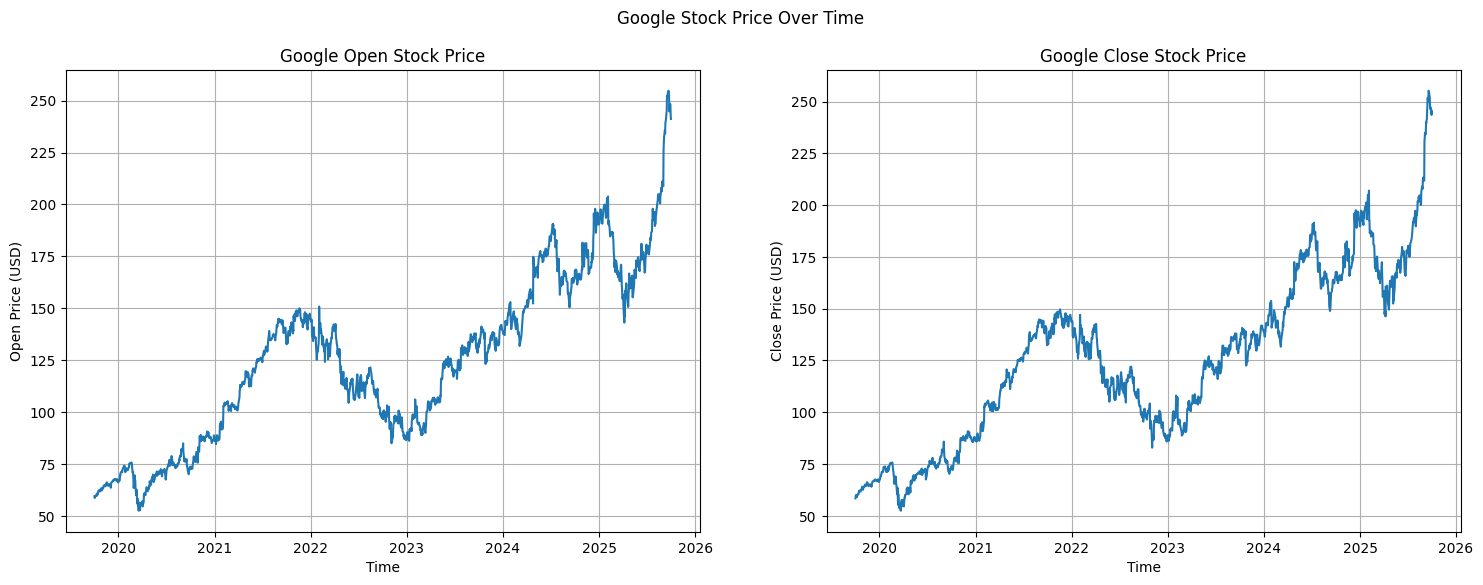

In [28]:
# Plot Open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Google Open Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("Google Close Stock Price")
plt.grid()

plt.suptitle("Google Stock Price Over Time")
plt.show()

we will concentrate our analysis on the most recent six-year data, as it is expected to provide more accurate insights for predicting future trends.

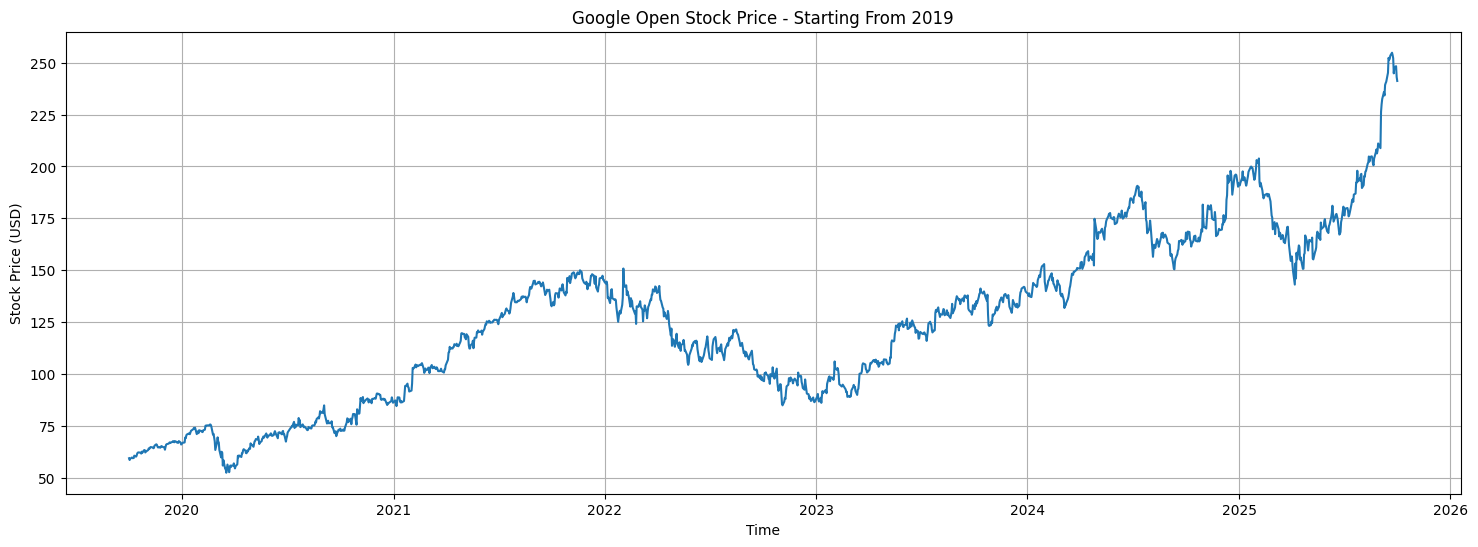

In [30]:
# Plot Open stock price performance in the last five years
plt.figure(figsize=(18,6))
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Google Open Stock Price - Starting From 2019")
plt.grid()

The selected period seems to be more relevant for analysis, as it's more likely to drive the stock performance with the impact of other external factors.